In [1]:
import pandas as pd
#import matplotlib.pyplot as plt # matplotlib for graphing
#%pylab inline #The %pylab inline is an Ipython command, that allows graphs to be embedded in the notebook.
data = pd.read_csv(r'C:\Users\Елена\Python\pvloop\data\rat_11_ivl.txt' , sep='/t', decimal=",")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
data.head()

,Channel 6 Channel 7 Channel 8
0,Mean\tMean\tMean
1,"2,0114\t261,2889"
2,"2,025\t264,6897"
3,"2,0387\t267,8679"
4,"2,0387\t270,7234"


delete first row
apply function(apply(split()))

In [4]:
data = data.drop([0])
data.head()

,Channel 6 Channel 7 Channel 8
1,"2,0114\t261,2889"
2,"2,025\t264,6897"
3,"2,0387\t267,8679"
4,"2,0387\t270,7234"
5,"2,0387\t273,3374"


In [5]:
data['p'], data['V'] = zip(*data['Channel 6	Channel 7	Channel 8'].map(lambda x: x.split('\t')))
data = data.drop('Channel 6	Channel 7	Channel 8', axis=1)
data.head()

,p,V
1,"2,0114","261,2889"
2,"2,025","264,6897"
3,"2,0387","267,8679"
4,"2,0387","270,7234"
5,"2,0387","273,3374"


In [6]:
df = data.copy()
df['p'] = [x.replace(',', '.') for x in df['p']]
df['p'] = df['p'].astype(float)
df['V'] = [x.replace(',', '.') for x in df['V']]
df['V'] = df['V'].astype(float)

df.head()

,p,V
1,2.0114,261.2889
2,2.0250,264.6897
3,2.0387,267.8679
4,2.0387,270.7234
5,2.0387,273.3374


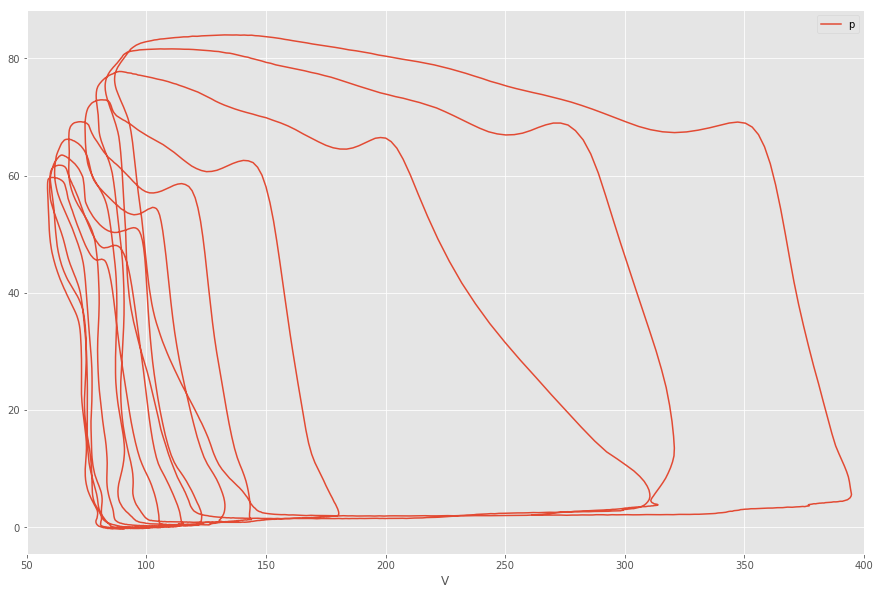

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt # matplotlib for graphing
#plt.xlim(0, 250)
plt.style.use('ggplot')
df.plot(x='V', y='p', kind='line', figsize=(15, 10), xlim=(50, 400))
plt.show()

In [10]:
import pandas as pd
#import matplotlib.pyplot as plt # matplotlib for graphing
#%pylab inline #The %pylab inline is an Ipython command, that allows graphs to be embedded in the notebook.
df1 = pd.read_csv(r'C:\Users\Елена\Python\pvloop\data\rat_11_ivl_haemodynamic_table.txt' , sep='/t')
df1 = df1[:8]
df1['SW'], df1['Ves'], df1['Ved'], df1['Pes'], df1['Ped'], df1['dP/dt max'] = zip(*df1['SW (mmHg*µL)	Ves (µL)	Ved (µL)	Pes (mmHg)	Ped (mmHg)	dP/dt max (mmHg/s)'].map(lambda x: x.split('\t')))
df1 = df1.drop('SW (mmHg*µL)	Ves (µL)	Ved (µL)	Pes (mmHg)	Ped (mmHg)	dP/dt max (mmHg/s)', axis=1)
df1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,SW,Ves,Ved,Pes,Ped,dP/dt max
0,"1,966e+004","87,64","392,6","78,18","4,591",4221
1,"1,511e+004","83,45","311,7","76,81","4,118",4105
2,"1,094e+004","79,71","306,0","75,23","3,345",3852
3,4795,"75,45","180,4","71,41","2,121",3407
4,3090,"68,19","143,2","68,31","1,594",3031
5,2370,"63,42","130,6","64,55","1,218",2682
6,1787,"61,19","122,6","61,87","0,8415",2408
7,1438,"60,10","114,9","60,81","0,6910",2182


In [11]:
df1['Ped'] = [x.replace(',', '.') for x in df1['Ped']]
df1['Ped'] = df1['Ped'].astype(float)
df1['Pes'] = [x.replace(',', '.') for x in df1['Pes']]
df1['Pes'] = df1['Pes'].astype(float)

df1['Ves'] = [x.replace(',', '.') for x in df1['Ves']]
df1['Ves'] = df1['Ves'].astype(float)
df1['Ved'] = [x.replace(',', '.') for x in df1['Ved']]
df1['Ved'] = df1['Ved'].astype(float)

df1['SW'] = [x.replace(',', '.') for x in df1['SW']]
df1['SW'] = df1['SW'].astype(float)
df1['dP/dt max'] = [x.replace(',', '.') for x in df1['dP/dt max']]
df1['dP/dt max'] = df1['dP/dt max'].astype(float)

df1.dtypes

SW           float64
Ves          float64
Ved          float64
Pes          float64
Ped          float64
dP/dt max    float64
dtype: object

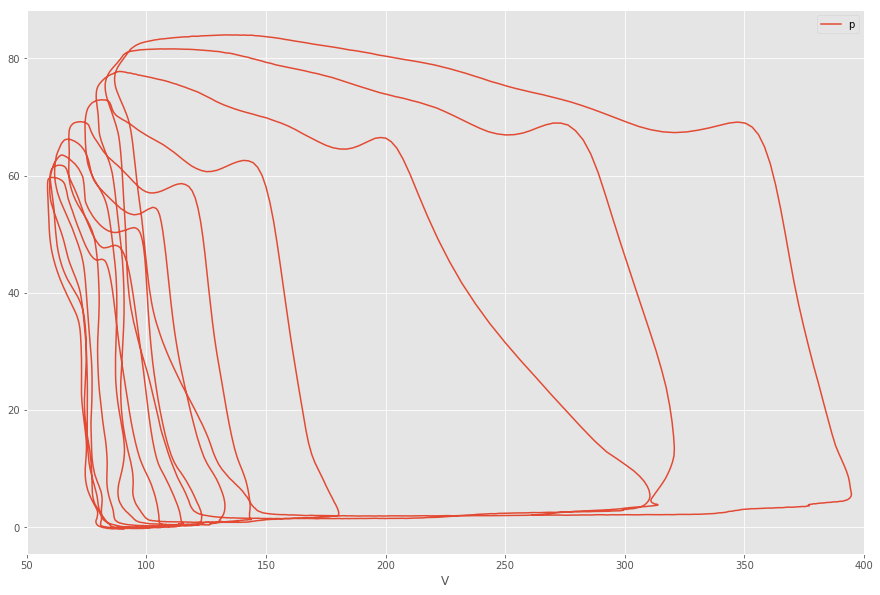

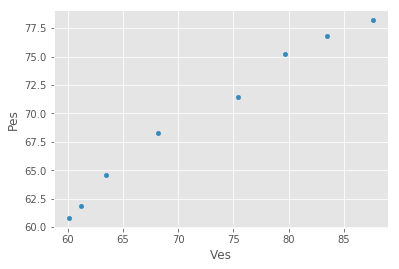

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt # matplotlib for graphing
#plt.xlim(0, 250)
df.plot(x='V', y='p', kind='line', figsize=(15, 10), xlim=(50, 400))

df1.plot(x='Ves', y='Pes', kind='scatter')
# plt.gca().invert_xaxis()
plt.show()

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
Im = linear_model.LinearRegression()
X = df1.drop('Pes', axis = 1)
# pd.DataFrame(zip(X.columns, Im.coef_), columns = ['features', 'Coef'])
Im.fit(X, df1.Pes)
print(Im.intercept_, '\n', Im.coef_)


35.8556785868 
 [ -2.83673508e-04   1.69271549e-01   5.97692942e-03   9.00224696e-01
   6.26688595e-03]


In [23]:
Im = linear_model.LinearRegression()
Im.fit(df1['Ves'].reshape(-1,1), df1['Pes'])
Im2 = linear_model.LinearRegression()
Im2.fit(df1['Ved'].reshape(-1, 1), df1['Ped'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

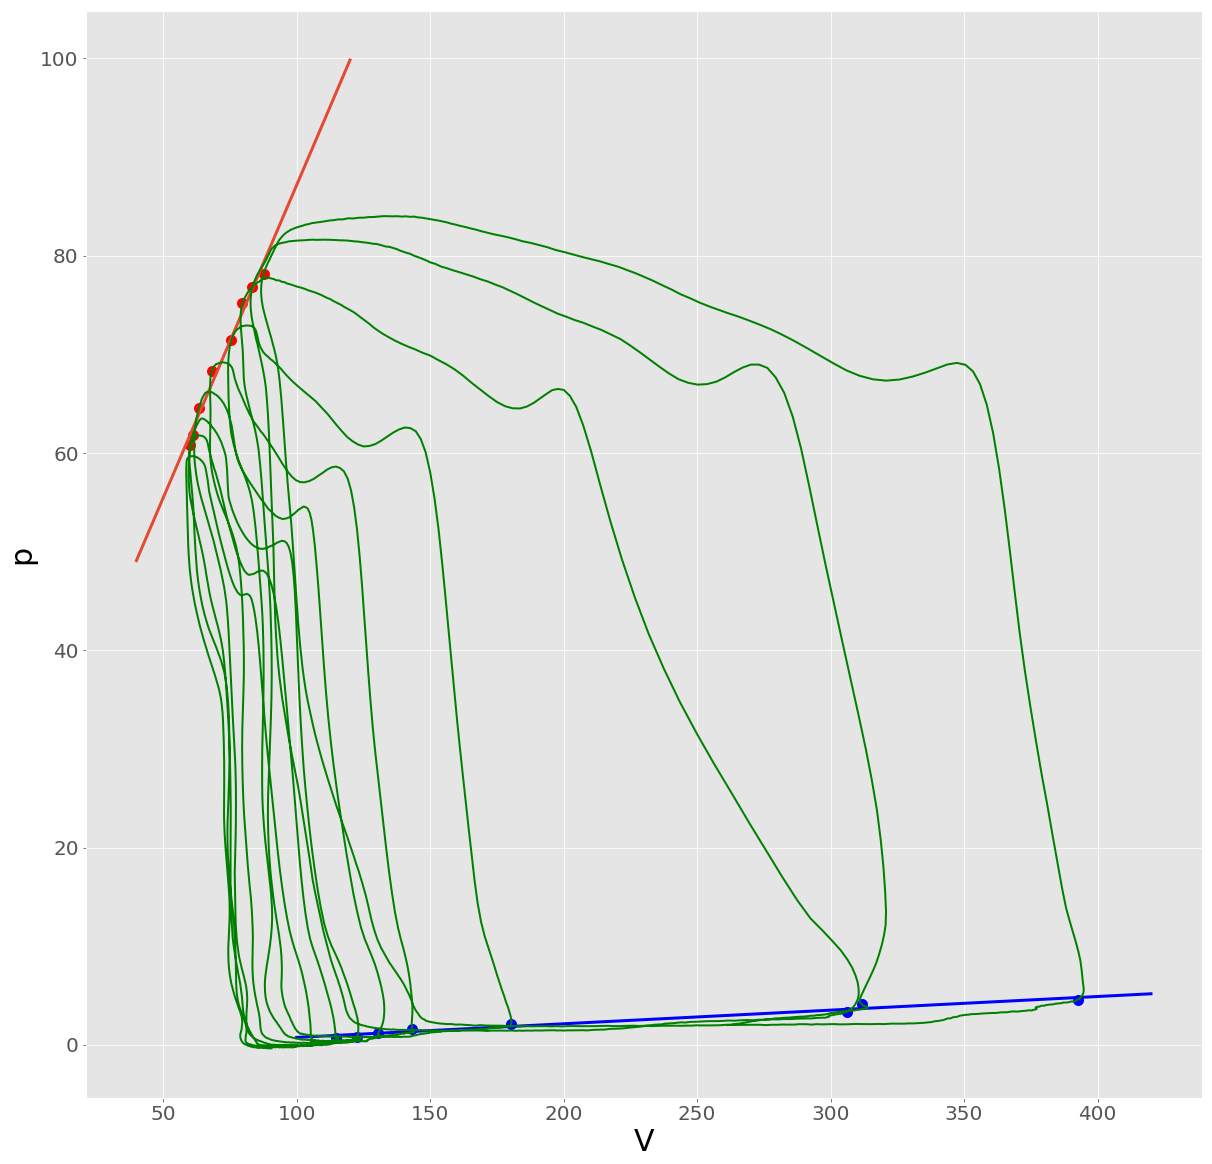

In [24]:
import numpy as np
import seaborn as sns
sample = np.arange(40, 130, 10).reshape(-1, 1)
output = Im.predict(sample)
sample2 = np.arange(100, 430, 10).reshape(-1, 1)
output2 = Im2.predict(sample2)
plt.figure(figsize=(20,20))
plt.plot(sample, output, lw=3)
plt.plot(sample2, output2, lw=3, color='b')
plt.scatter(df1['Ves'], df1['Pes'], lw=5, color='r')
plt.scatter(df1['Ved'], df1['Ped'], lw=5, color='b')
plt.plot(df['V'], df['p'], c='g', lw=2)
plt.xlabel('V', fontsize=30, color='black')
plt.ylabel('p', fontsize=30, color='black')
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
plt.style.available